# Chemical Space

In order to see how much data is distributed, it is common to map in an appropriate space. Especially in chemoinformatics the word chemical space is used


Chemical space refers to arrangements of compounds in an n-dimensional space at some scale. In general, 
two or three dimensions are often used (for human understanding). Although various methods have been proposed 
for the scale i.e. similarity, it is often decided that a distance that well characterizes compound is defined


This time, we will visualize which pharmaceutical company is developing what kind of compound for the antagonist 
of Orexin Receptor, which is known as a target for sleep medicine. 

This time, we will visualize which pharmaceutical company is developing what kind of compound for 
the Orexin Receptor, which is known as a target for sleep medicine. 

There are two main things I want to know this time:

1. Were there companies that developed similar compounds?

2. Has Merck optimized only similar frameworks, or did it optimize multiple frameworks?



In [14]:


from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
import seaborn as sns
#import ggplot
from sklearn.decomposition import PCA
import os


In [4]:
oxrs = [("CHEMBL3098111", "Merck" ),("CHEMBL3867477", "Merck" ),
("CHEMBL2380240", "Rottapharm" ),("CHEMBL3352684", "Merck" ),
("CHEMBL3769367", "Merck" ),("CHEMBL3526050", "Actelion" ),
("CHEMBL3112474", "Actelion" ),("CHEMBL3739366", "Heptares" ),
("CHEMBL3739395", "Actelion" ), ("CHEMBL3351489", "Eisai" )]

In [5]:
fps = []
docs = []
companies = []

for cid,company in oxrs:
    sdf_file = os.path.join('/home/oohnohnoh1/Desktop/GIT/Chemiinformatics_work/py4chemoinformatics/notebooks/ch08/' +  cid + '.sdf')
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp,arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)

fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)
            

In [6]:
docs

array(['CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111',
       'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111',
       'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111',
       'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111', 'CHEMBL3098111',
       'CHEMBL3098111', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477', 'CHEMBL3867477',
       'CHEMBL3867477', '

In [8]:
pca = PCA(n_components = 2)

In [9]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
fps

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [8]:
x

array([[-0.66925394,  3.2289189 ],
       [ 0.3281574 ,  2.63548814],
       [ 0.32968346,  2.13661898],
       [-0.400118  ,  2.87836801],
       [ 0.20176771,  3.00920942],
       [ 0.1633327 ,  2.9268046 ],
       [-0.43651755,  2.90944508],
       [ 0.23035584,  2.98608099],
       [-0.65095242,  2.70337735],
       [ 0.13639908,  3.03869327],
       [-0.73150273,  2.80022114],
       [-0.63870729,  3.17549383],
       [-0.83701352,  2.74171177],
       [-0.76519484,  2.87643751],
       [-0.68836292,  2.71764592],
       [-0.76575355,  2.87912399],
       [ 0.25370081,  2.16274312],
       [ 3.65161694, -2.38573069],
       [ 3.30436539, -2.66009118],
       [ 3.48734315, -2.58271968],
       [ 4.14694884, -3.14551804],
       [ 0.65294991,  0.74299837],
       [ 3.46290444, -2.34099082],
       [ 3.6532743 , -2.64705769],
       [ 3.49616753, -2.19119923],
       [ 2.84254743, -2.76565407],
       [ 3.39671418, -2.11051739],
       [ 3.38709623, -2.29144633],
       [ 3.34008279,

In [10]:
d = pd.DataFrame(x)
d.columns = ["PCA1", "PCA2"]
d["DOCID"] = docs
d["COMPANY"] = companies


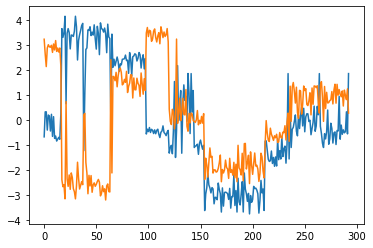

In [15]:
import matplotlib.pyplot as plt
plt.plot(d)